In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os

In [2]:
df_dataAP = pd.read_csv("./Admission_Predict_Ver1.1.csv", sep= ",")

In [3]:
df_dataAP.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
df_dataAP.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df_dataAP.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
print (df_dataAP.info())
print (df_dataAP.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB
None
Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [7]:
# drop serial no.
df_data = df_dataAP.drop(columns=["Serial No."], inplace= False)

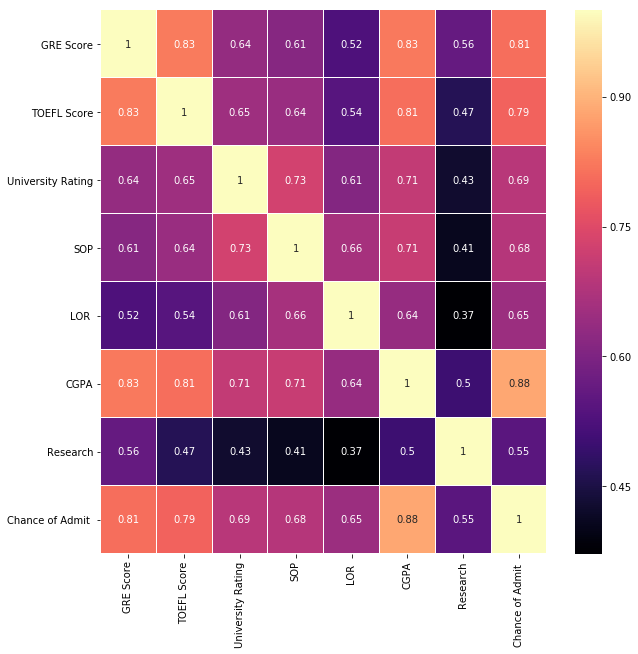

In [8]:
# correlation
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_data.corr(), annot= True, linewidths=0.05, cmap= "magma")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


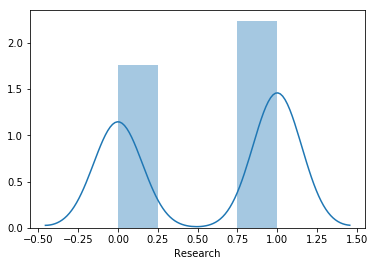

In [9]:
# df_data["Research"].hist(bins = 10, figsize=(10,10))
# val_list_resch = df_data["Research"].unique().tolist()
# print (val_list_resch)

sns.distplot(df_data["Research"] )

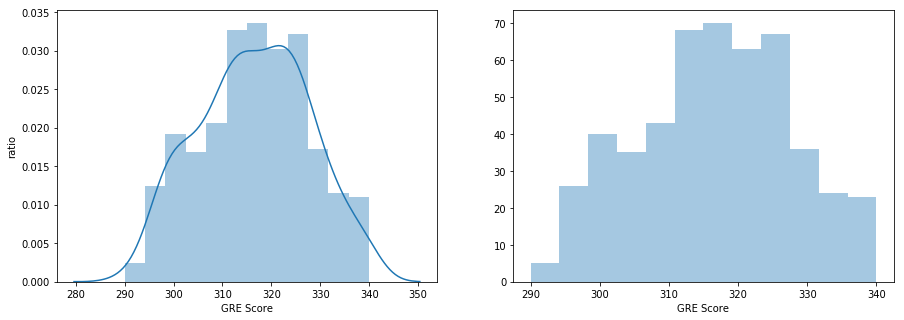

In [10]:
fig_ = plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_data["GRE Score"], kde= True)
plt.ylabel("ratio")

plt.subplot(1,2,2)
sns.distplot(df_data["GRE Score"], kde= False)

Text(0, 0.5, 'Frequency')

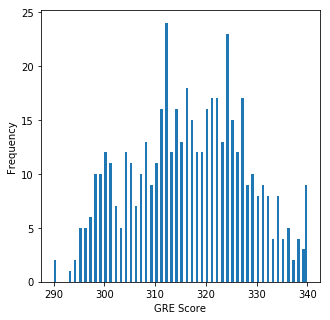

In [11]:
df_data["GRE Score"].plot(kind = 'hist', bins = 100, figsize=(5,5))
plt.xlabel("GRE Score")
plt.ylabel("Frequency")

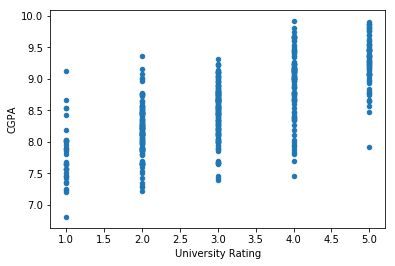

In [12]:
df_data.plot.scatter(x = "University Rating", y = "CGPA")

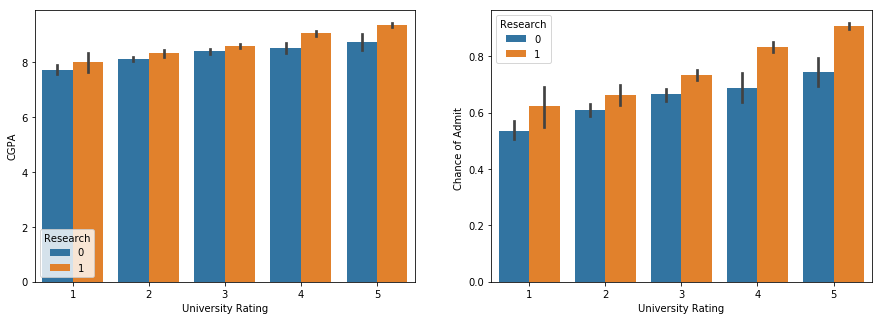

In [13]:
## relative plots
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x = "University Rating", y = "CGPA", hue = "Research", data = df_data)

plt.subplot(1,2,2)
sns.barplot(x = "University Rating", y = "Chance of Admit ", hue = "Research", data = df_data)

In [14]:
df_data.rename(columns={"Chance of Admit " : "Chance of Admit"}, inplace= True)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [16]:
y = df_data["Chance of Admit"].values
x = df_data.drop(columns= ["Chance of Admit"])
# first train, test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [17]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 249 to 102
Data columns (total 7 columns):
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
dtypes: float64(3), int64(4)
memory usage: 25.0 KB


In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
dtypes: float64(3), int64(4)
memory usage: 27.4 KB


In [19]:
min_max_scalar = preprocessing.MinMaxScaler()
# normalization is based on training
feature_scalar = min_max_scalar.fit(x_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [20]:
x_train_sc = min_max_scalar.transform(x_train)
# normalize based on training data info
x_test_sc = min_max_scalar.transform(x_test)

In [21]:
# just to examine the normalized result
x_train_sc_df = pd.DataFrame(x_train_sc)
x_train_sc_df.describe()
x_train.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.727500,107.335000,3.112500,3.375000,3.480000,8.580750,0.555000
std,10.969232,6.091432,1.145917,0.987072,0.921533,0.601328,0.497588
min,290.000000,92.000000,1.000000,1.000000,1.500000,6.800000,0.000000
25%,309.000000,103.000000,2.000000,2.500000,3.000000,8.137500,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.565000,1.000000
75%,324.250000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


In [26]:
# now start to fit

# 1. Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

lr = LinearRegression()
# lr = SGDRegressor()
lr.fit(x_train_sc, y_train)

y_prdt = lr.predict(x_test_sc)
y_prdt_train = lr.predict(x_train_sc)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# print ("Training r2:", r2_score(y_prdt_train, y_train))
# print ("Testing r2:", r2_score(y_prdt, y_test))

print ("Training mae:", mean_absolute_error(y_prdt_train, y_train))
print ("Testing mae:", mean_absolute_error(y_prdt, y_test))


Training mae: 0.042533340611643135
Testing mae: 0.04272265427705364


In [27]:
# 2. RandomForrest Regressor
from sklearn.ensemble import RandomForestRegressor

r2Score_train=[]
r2Score_test= []

nTreeList = range(20, 200, 10)
maxFeat = 3
depth = 4

for iTree in nTreeList:
    rf_reg = RandomForestRegressor(n_estimators = iTree, max_depth = depth, max_features = maxFeat, oob_score = False, random_state = 42)
    rf_reg.fit(x_train_sc, y_train)
    
    r2Score_train.append( mean_absolute_error(y_train, rf_reg.predict(x_train_sc)) )
    r2Score_test.append( mean_absolute_error(y_test, rf_reg.predict(x_test_sc)) )

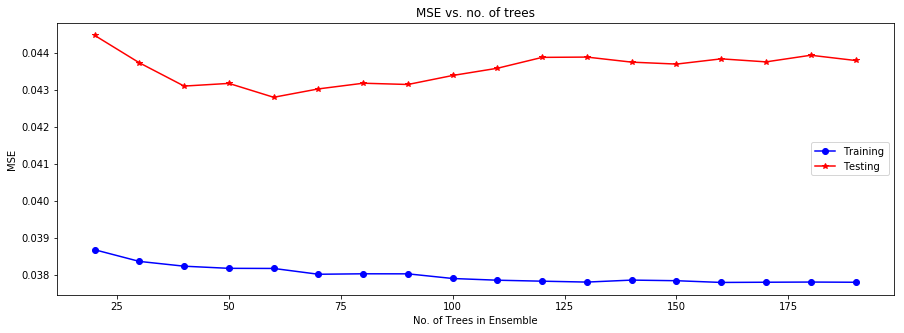

Best testing score 0.043: with nTree =  20 , depth = 4, max_feat = 3


In [29]:
plt.figure(figsize=(15,5))

# plt.subplot(1,2,1)
# plt.title("Training")
# plt.plot(nTreeList, r2Score_train)
# plt.xlabel("No. of Trees in Ensemble")
# plt.ylabel("R2 Score")

# plt.subplot(1,2,2)
# plt.title("Testing")
# plt.plot(nTreeList, r2Score_test)
# plt.xlabel("No. of Trees in Ensemble")
# plt.ylabel("R2 Score")

plt.title("MSE vs. no. of trees")
plt.plot(nTreeList, r2Score_train, color = "blue", marker = "o", label = "Training")
plt.plot(nTreeList, r2Score_test, color = "red", marker = "*", label = "Testing")
plt.xlabel("No. of Trees in Ensemble")
plt.ylabel("MSE")
plt.legend()
plt.show()

print ("Best testing score {:.2}:".format(min(r2Score_test)), "with nTree = ", nTreeList[ r2Score_test.index(max(r2Score_test)) ], ", depth = {:}, max_feat = {:}".format(depth, maxFeat))

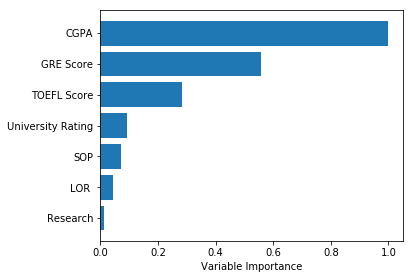

In [30]:
def display_featureImportance(dfData, featureImportance):
    featureImportance = featureImportance / featureImportance.max()
    headerNames = dfData.columns.values.tolist()
    sortedIdx = np.argsort(featureImportance)
    barPos = np.arange(sortedIdx.shape[0]) + .5    
    headerNames = np.array(headerNames)[sortedIdx]
    plt.barh(barPos, featureImportance[sortedIdx], align='center')
    plt.yticks(barPos, headerNames)
    plt.xlabel('Variable Importance')
    plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
    plt.show()

iTreeBest =  nTreeList[ r2Score_test.index(min(r2Score_test)) ]
rf_reg_best = RandomForestRegressor(n_estimators=iTreeBest, \
                                             max_depth=depth,\
                                             max_features=maxFeat,\
                                             oob_score=False, random_state=42)

rf_reg_best.fit(x_train_sc, y_train)   
# print(rf_reg_best.estimators_)
display_featureImportance(x, rf_reg_best.feature_importances_)

In [32]:
# 3. Support Vector Machine
from sklearn.svm import SVR

sv_reg = SVR()
sv_reg.fit(x_train_sc, y_train)

y_train_sv_reg = sv_reg.predict(x_train_sc)
y_test_sv_reg = sv_reg.predict(x_test_sc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [37]:
print ("Training mae:", mean_absolute_error(y_train_sv_reg, y_train))
print ("Testing mae:", mean_absolute_error(y_test_sv_reg, y_test))
print (sv_reg.get_params)

Training mae: 0.05886850306949526
Testing mae: 0.0554494561073823
<bound method BaseEstimator.get_params of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)>
